In [12]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import umap.umap_ as umap
import umap.plot
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

In [25]:
# load data 

data = pd.read_csv ("../data/scaled_data_dropUNK.csv", index_col=0)
y = pd.read_csv("../data/labels_dropUNK.csv", index_col = 0)



In [14]:
UMAP= umap.UMAP()
umap_red= UMAP.fit_transform(data)

labels = y['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)




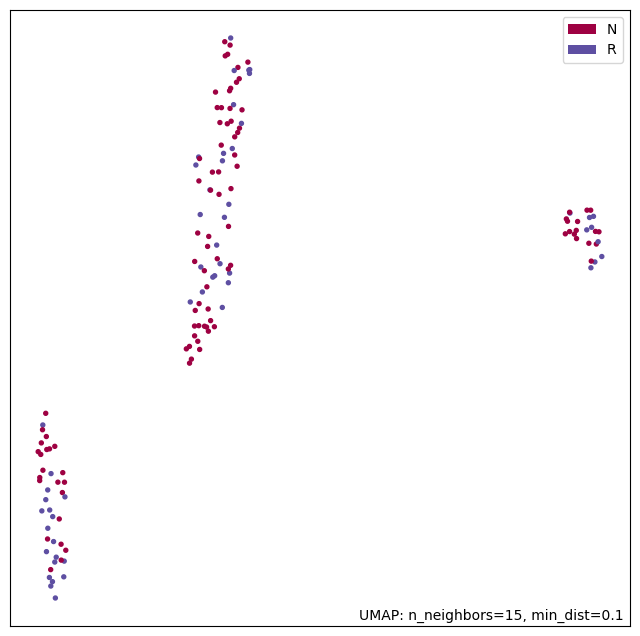

In [16]:
umap.plot.points(UMAP, labels = labels)
umap.plot.plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


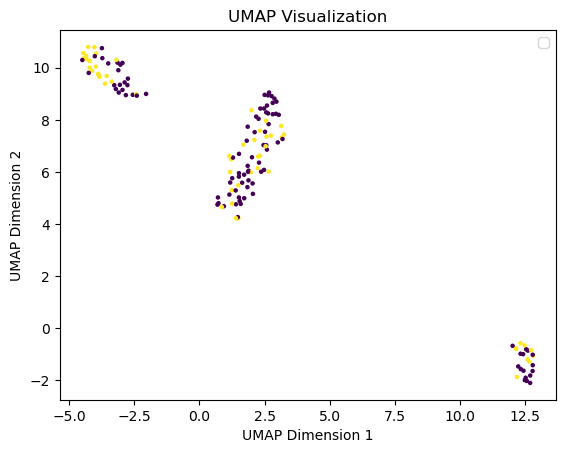

In [6]:
scatter = plt.scatter(umap_red[:, 0], umap_red[:, 1], c=labels_encoded, cmap='viridis', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Label 0', 'Label 1'], title='Labels')
plt.legend()
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [18]:
# to find the two populations 
filtered_points = [index for index, value in enumerate(umap_red[:, 0]) if value >10]
label_data = pd.read_csv ("../data/log2_data_v3.csv", index_col=0)
og_data_names = label_data.index[filtered_points].tolist()
# print(imputed_data.head())
# og_data_names = [PCA_mapping[index] for index in filtered_points]
print(len(og_data_names))
print(og_data_names)

25
['SRR7344546', 'SRR7344554', 'SRR7344556', 'SRR7344564', 'SRR7344565', 'SRR7344567', 'SRR7344574', 'SRR7344575', 'ERR2208929', 'ERR2208930', 'ERR2208931', 'ERR2208933', 'ERR2208934', 'ERR2208935', 'ERR2208936', 'ERR2208938', 'ERR2208939', 'ERR2208940', 'ERR2208941', 'ERR2208942', 'ERR2208943', 'ERR2208945', 'ERR2208946', 'ERR2208948', 'ERR2208949']


In [19]:
hyperparameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

In [26]:
data = pd.read_csv ("../data/scaled_data_V3.csv", index_col=0)
y = pd.read_csv("../data/labels_V3.csv", index_col = 0)
# split data 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state=1210)

In [ ]:
grid_search = GridSearchCV(LogisticRegression(penalty="l1"), hyperparameters,  cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#best hyperparameters 
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
print("Best hyperparameters:", best_params)
print("Test set accuracy:", test_accuracy)
print("Training accuracy:", training_accuracy)

In [ ]:
def L1_reg ()